![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [202]:
df = pd.read_csv('Hospitalización.csv', encoding= 'latin-1')

In [203]:
nuevos_nombres = {
    'EDAD': 'Edad',
    'DIABETES': 'Diabetes',
    'HOSPITALIZACIÓN ULTIMO MES': 'Hospitalizacion_Ultimo_Mes',
    'PSA': 'PSA',
    'BIOPSIAS PREVIAS': 'Biopsias_Previas',
    'VOLUMEN PROSTATICO': 'Volumen_Prostatico',
    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'Antibiotico_Profilaxis',
    'NUMERO DE MUESTRAS TOMADAS': 'Numero_Muestras_Tomadas',
    'CUP': 'CUP',
    'ENF. CRONICA PULMONAR OBSTRUCTIVA': 'Enf_Cronica_Pulmonar_Obstructiva',
    'BIOPSIA': 'Biopsia',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'Dias_Post_Biopsia_Complicacion',
    'FIEBRE': 'Fiebre',
    'ITU': 'ITU',
    'TIPO DE CULTIVO': 'Tipo_Cultivo',
    'AGENTE AISLADO': 'Agente_Aislado',
    'PATRON DE RESISTENCIA': 'Patron_Resistencia',
    'HOSPITALIZACION': 'Hospitalizacion',
    'DIAS HOSPITALIZACION MQ': 'Dias_Hospitalizacion_MQ',
    'DIAS HOSPITALIZACIÓN UPC': 'Dias_Hospitalizacion_UPC'
}
df = df.rename(columns=nuevos_nombres)

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [204]:
df

,Edad,Diabetes,Hospitalizacion_Ultimo_Mes,PSA,Biopsias_Previas,Volumen_Prostatico,Antibiotico_Profilaxis,Numero_Muestras_Tomadas,CUP,Enf_Cronica_Pulmonar_Obstructiva,Biopsia,Dias_Post_Biopsia_Complicacion,Fiebre,ITU,Tipo_Cultivo,Agente_Aislado,Patron_Resistencia,Hospitalizacion,Dias_Hospitalizacion_MQ,Dias_Hospitalizacion_UPC
0,53.0,NO,NO,4,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,"7,7",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,69.0,NO,NO,"4,43",NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
df[df['Hospitalizacion'].isnull()]

,Edad,Diabetes,Hospitalizacion_Ultimo_Mes,PSA,Biopsias_Previas,Volumen_Prostatico,Antibiotico_Profilaxis,Numero_Muestras_Tomadas,CUP,Enf_Cronica_Pulmonar_Obstructiva,Biopsia,Dias_Post_Biopsia_Complicacion,Fiebre,ITU,Tipo_Cultivo,Agente_Aislado,Patron_Resistencia,Hospitalizacion,Dias_Hospitalizacion_MQ,Dias_Hospitalizacion_UPC
31,63.0,NO,NO,"10,8",NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
100,74.0,NO,NO,"5,8",NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
109,61.0,NO,NO,7,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#¡VALOR!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
df.drop([568,569,31,100,109], inplace=True)

In [207]:
df.Dias_Post_Biopsia_Complicacion.value_counts()

Dias_Post_Biopsia_Complicacion
NO    539
2       9
3       8
1       5
5       2
9       2
Name: count, dtype: int64

In [208]:
df[df['Agente_Aislado'] != 'NO']

,Edad,Diabetes,Hospitalizacion_Ultimo_Mes,PSA,Biopsias_Previas,Volumen_Prostatico,Antibiotico_Profilaxis,Numero_Muestras_Tomadas,CUP,Enf_Cronica_Pulmonar_Obstructiva,Biopsia,Dias_Post_Biopsia_Complicacion,Fiebre,ITU,Tipo_Cultivo,Agente_Aislado,Patron_Resistencia,Hospitalizacion,Dias_Hospitalizacion_MQ,Dias_Hospitalizacion_UPC
2,57.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
4,55.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
6,53.0,NO,NO,7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3.0,0.0
7,67.0,NO,NO,"6,2",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",SI,2.0,0.0
10,54.0,NO,NO,"7,7",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3.0,0.0
11,68.0,NO,NO,"6,2",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",SI,5.0,0.0
22,69.0,SI,NO,14,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,ADENOCARCINOMA GLEASON 7,5,SI,SI,UROCULTIVO,PSEUDOMONAS AERUGINOSA,MULTI SENSIBLE,SI,12.0,0.0
23,69.0,NO,NO,14,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,ADENOCARCINOMA GLEASON 7,5,SI,SI,UROCULTIVO,PSEUDOMONAS AERUGINOSA,MULTI SENSIBLE,SI,12.0,0.0
26,75.0,NO,NO,25,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
99,70.0,NO,NO,"7,2",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0


In [209]:
df.loc[[181,161]]

,Edad,Diabetes,Hospitalizacion_Ultimo_Mes,PSA,Biopsias_Previas,Volumen_Prostatico,Antibiotico_Profilaxis,Numero_Muestras_Tomadas,CUP,Enf_Cronica_Pulmonar_Obstructiva,Biopsia,Dias_Post_Biopsia_Complicacion,Fiebre,ITU,Tipo_Cultivo,Agente_Aislado,Patron_Resistencia,Hospitalizacion,Dias_Hospitalizacion_MQ,Dias_Hospitalizacion_UPC
181,151.0,NO,NO,"5,7",NO,SI,OTROS,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
161,143.0,SI,NO,"6,8",NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [210]:
df.drop([181,161],axis=0, inplace=True)

In [211]:
columnas = ['Edad','Diabetes','Hospitalizacion_Ultimo_Mes','PSA','Biopsias_Previas','Volumen_Prostatico','CUP','Enf_Cronica_Pulmonar_Obstructiva','Biopsia','Dias_Post_Biopsia_Complicacion','Fiebre','ITU','Hospitalizacion']

columnas_drop = ['Hospitalizacion_Ultimo_Mes','Antibiotico_Profilaxis','Numero_Muestras_Tomadas','Tipo_Cultivo','Agente_Aislado','Patron_Resistencia','Dias_Hospitalizacion_MQ','Dias_Hospitalizacion_UPC']

In [212]:
df = df[columnas]

In [213]:
df.Hospitalizacion.value_counts()

Hospitalizacion
NO    539
SI     24
Name: count, dtype: int64

In [214]:
df['PSA'] = df['PSA'].str.replace(',', '.')

C:\Users\Marcos\AppData\Local\Temp\ipykernel_14904\1369734271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PSA'] = df['PSA'].str.replace(',', '.')


In [215]:
df['PSA'] = df['PSA'].astype(float)

C:\Users\Marcos\AppData\Local\Temp\ipykernel_14904\1373595739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PSA'] = df['PSA'].astype(float)


In [216]:
df

,Edad,Diabetes,Hospitalizacion_Ultimo_Mes,PSA,Biopsias_Previas,Volumen_Prostatico,CUP,Enf_Cronica_Pulmonar_Obstructiva,Biopsia,Dias_Post_Biopsia_Complicacion,Fiebre,ITU,Hospitalizacion
0,53.0,NO,NO,4.00,NO,SI,NO,NO,NEG,1,SI,NO,SI
1,56.0,NO,NO,7.70,NO,SI,NO,NO,NEG,1,SI,NO,SI
2,57.0,NO,NO,29.00,SI,SI,NO,NO,NEG,1,SI,NO,SI
3,56.0,NO,NO,7.00,NO,SI,NO,NO,NEG,1,SI,NO,SI
4,55.0,NO,NO,29.00,SI,SI,NO,NO,NEG,1,SI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,NO,NO,6.00,NO,SI,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO
564,64.0,NO,NO,4.80,NO,SI,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO
565,69.0,NO,NO,4.43,NaN,NaN,NaN,NO,NEG,NO,NO,NO,NO
566,67.0,NO,NO,8.00,NO,SI,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO


In [217]:
df.describe()

,Edad,PSA
count,563.000000,559.000000
mean,63.575488,13.325528
std,7.872600,15.727500
min,39.000000,0.600000
25%,59.000000,5.600000
50%,64.000000,8.000000
75%,69.000000,15.000000
max,84.000000,100.000000


In [237]:
df.isna().sum()

Edad                                0
Diabetes                            0
Hospitalizacion_Ultimo_Mes          0
PSA                                 0
Biopsias_Previas                    0
Volumen_Prostatico                  0
CUP                                 0
Enf_Cronica_Pulmonar_Obstructiva    0
Biopsia                             0
Dias_Post_Biopsia_Complicacion      0
Fiebre                              0
ITU                                 0
Hospitalizacion                     0
dtype: int64

In [236]:
df[df['Enf_Cronica_Pulmonar_Obstructiva'].isna()]

,Edad,Diabetes,Hospitalizacion_Ultimo_Mes,PSA,Biopsias_Previas,Volumen_Prostatico,CUP,Enf_Cronica_Pulmonar_Obstructiva,Biopsia,Dias_Post_Biopsia_Complicacion,Fiebre,ITU,Hospitalizacion


In [238]:
df.drop([566,567], axis=0, inplace=True)

KeyError: '[566, 567] not found in axis'

In [239]:
#Detectar Outliers (Mediana)

def detectar_outliers(data, columna):
    """
    Detecta outliers en una columna de un DataFrame utilizando el método del rango intercuartílico.

    Parameters:
    - data: DataFrame que contiene los datos.
    - columna: Nombre de la columna en la que se desea detectar outliers.

    Returns:
    - Una lista con los índices de las filas que contienen outliers.
    """

    # Obtener el primer y tercer cuartil
    q1 = data[columna].quantile(0.25)
    q3 = data[columna].quantile(0.75)

    # Calcular el rango intercuartílico (IQR)
    iqr = q3 - q1

    # Definir los límites para los outliers
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Encontrar los índices de los outliers
    outliers_indices = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)].index

    return outliers_indices

# Ejemplo de uso:
indices_outliers = detectar_outliers(df, 'Edad')
print("Índices de outliers:", indices_outliers)


Índices de outliers: Index([13, 55, 56, 159, 224, 309, 310, 414, 481], dtype='int64')


In [240]:
def detectar_outliers_media_varianza(data, columna, umbral=2):
    """
    Detecta outliers en una columna de un DataFrame utilizando la media y la varianza.

    Parameters:
    - data: DataFrame que contiene los datos.
    - columna: Nombre de la columna en la que se desea detectar outliers.
    - umbral: Número de desviaciones estándar para considerar un punto como outlier. Por defecto, se usa 2 desviaciones estándar.

    Returns:
    - Una lista con los índices de las filas que contienen outliers.
    """

    # Calcular la media y la desviación estándar
    media = data[columna].mean()
    desviacion_estandar = data[columna].std()

    # Definir los límites para los outliers
    limite_inferior = media - umbral * desviacion_estandar
    limite_superior = media + umbral * desviacion_estandar

    # Encontrar los índices de los outliers
    outliers_indices = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)].index

    return outliers_indices

# Ejemplo de uso:
indices_outliers_media_varianza = detectar_outliers_media_varianza(df, 'Edad')
print("Índices de outliers:", indices_outliers_media_varianza)


Índices de outliers: Index([ 13,  46,  48,  55,  56,  59,  60,  64, 159, 188, 208, 222, 223, 224,
       225, 274, 309, 310, 313, 316, 318, 414, 445, 465, 477, 479, 480, 481,
       482, 531],
      dtype='int64')


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

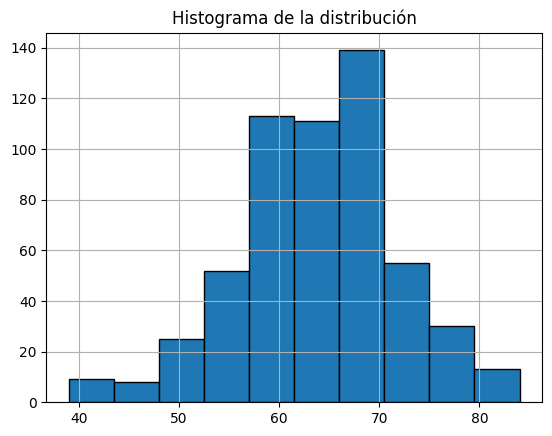

In [241]:
import matplotlib.pyplot as plt
df['Edad'].hist(bins=10, edgecolor='black')
plt.title('Histograma de la distribución')
plt.show()

In [242]:
df

,Edad,Diabetes,Hospitalizacion_Ultimo_Mes,PSA,Biopsias_Previas,Volumen_Prostatico,CUP,Enf_Cronica_Pulmonar_Obstructiva,Biopsia,Dias_Post_Biopsia_Complicacion,Fiebre,ITU,Hospitalizacion
0,53.0,NO,NO,4.0,NO,SI,NO,NO,NEG,1,SI,NO,SI
1,56.0,NO,NO,7.7,NO,SI,NO,NO,NEG,1,SI,NO,SI
2,57.0,NO,NO,29.0,SI,SI,NO,NO,NEG,1,SI,NO,SI
3,56.0,NO,NO,7.0,NO,SI,NO,NO,NEG,1,SI,NO,SI
4,55.0,NO,NO,29.0,SI,SI,NO,NO,NEG,1,SI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,57.0,NO,NO,4.8,NO,NO,NO,NO,NEG,NO,NO,NO,NO
561,75.0,NO,NO,75.0,NO,SI,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO
562,78.0,NO,NO,9.3,NO,SI,NO,NO,NEG,NO,NO,NO,NO
563,67.0,NO,NO,6.0,NO,SI,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO


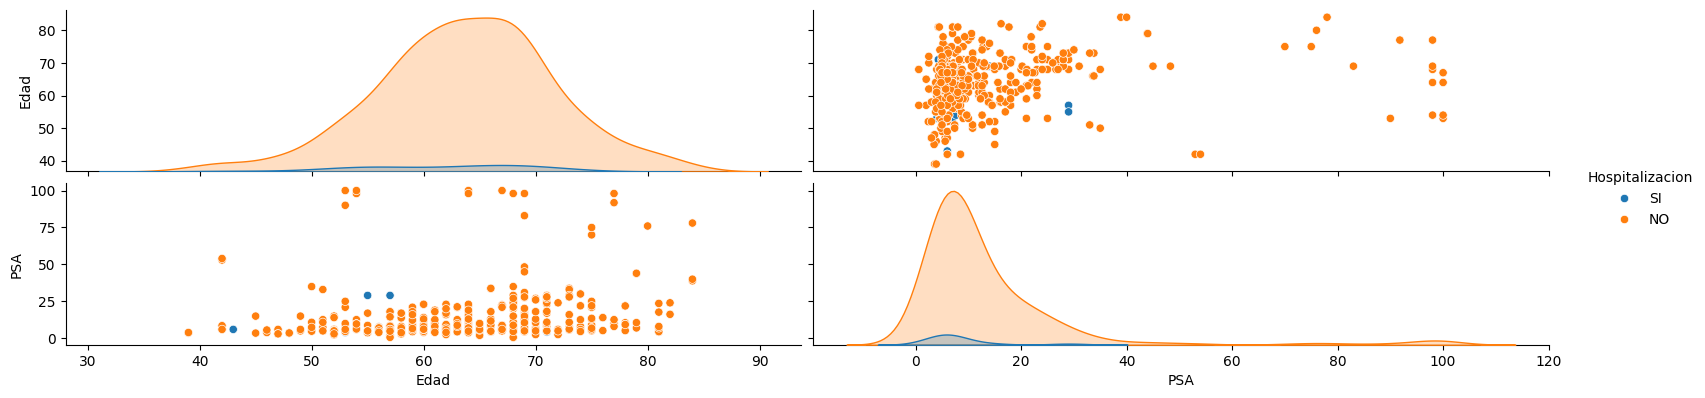

In [243]:
sns.pairplot(df, hue='Hospitalizacion',height=2, aspect=4)
plt.title('')
plt.show()

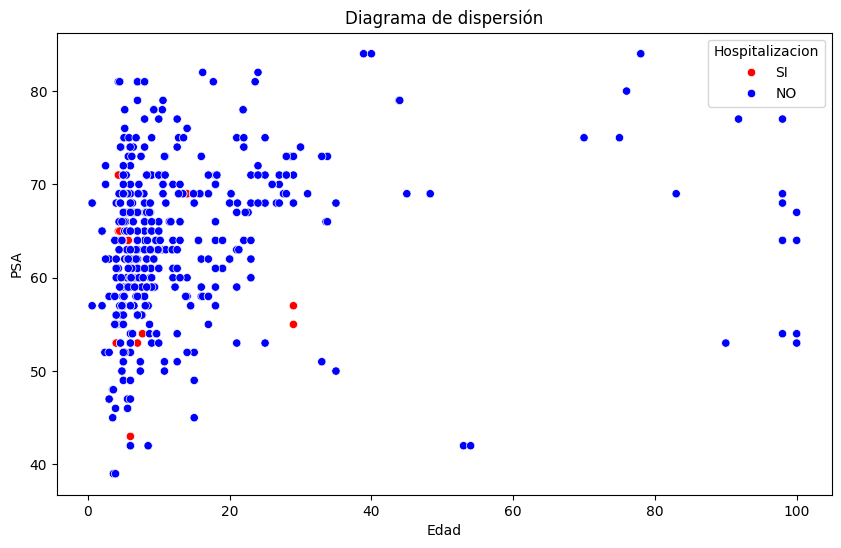

In [244]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PSA', y='Edad', data=df, hue='Hospitalizacion', palette={'SI':'red' , 'NO':'blue'})
plt.title('Diagrama de dispersión')
plt.xlabel('Edad')
plt.ylabel('PSA')
plt.show()


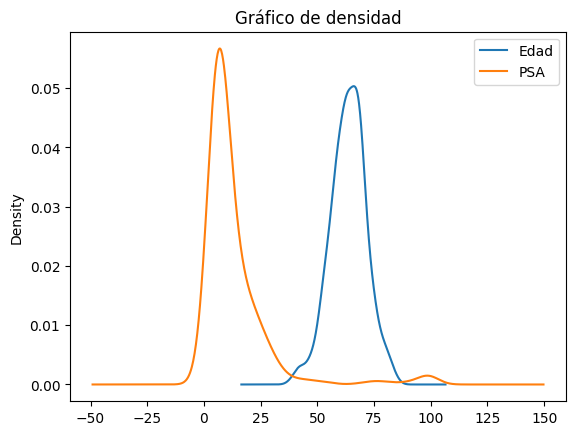

In [245]:
df.plot.kde()
plt.title('Gráfico de densidad')
plt.show()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

Para el caso de las variables numéricas, ¿Es necesario normalizar?

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [246]:
df

,Edad,Diabetes,Hospitalizacion_Ultimo_Mes,PSA,Biopsias_Previas,Volumen_Prostatico,CUP,Enf_Cronica_Pulmonar_Obstructiva,Biopsia,Dias_Post_Biopsia_Complicacion,Fiebre,ITU,Hospitalizacion
0,53.0,NO,NO,4.0,NO,SI,NO,NO,NEG,1,SI,NO,SI
1,56.0,NO,NO,7.7,NO,SI,NO,NO,NEG,1,SI,NO,SI
2,57.0,NO,NO,29.0,SI,SI,NO,NO,NEG,1,SI,NO,SI
3,56.0,NO,NO,7.0,NO,SI,NO,NO,NEG,1,SI,NO,SI
4,55.0,NO,NO,29.0,SI,SI,NO,NO,NEG,1,SI,NO,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,57.0,NO,NO,4.8,NO,NO,NO,NO,NEG,NO,NO,NO,NO
561,75.0,NO,NO,75.0,NO,SI,NO,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO
562,78.0,NO,NO,9.3,NO,SI,NO,NO,NEG,NO,NO,NO,NO
563,67.0,NO,NO,6.0,NO,SI,NO,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO


In [247]:
columns = ['Diabetes','Hospitalizacion_Ultimo_Mes','Biopsias_Previas','Volumen_Prostatico','CUP','Enf_Cronica_Pulmonar_Obstructiva','Fiebre','ITU','Hospitalizacion']

In [248]:
label_encoder = LabelEncoder()
for i in columns:
    df[i] = label_encoder.fit_transform(df[i])


C:\Users\Marcos\AppData\Local\Temp\ipykernel_14904\3478119563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = label_encoder.fit_transform(df[i])
C:\Users\Marcos\AppData\Local\Temp\ipykernel_14904\3478119563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = label_encoder.fit_transform(df[i])
C:\Users\Marcos\AppData\Local\Temp\ipykernel_14904\3478119563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [249]:
df

,Edad,Diabetes,Hospitalizacion_Ultimo_Mes,PSA,Biopsias_Previas,Volumen_Prostatico,CUP,Enf_Cronica_Pulmonar_Obstructiva,Biopsia,Dias_Post_Biopsia_Complicacion,Fiebre,ITU,Hospitalizacion
0,53.0,0,0,4.0,0,1,0,0,NEG,1,1,0,1
1,56.0,0,0,7.7,0,1,0,0,NEG,1,1,0,1
2,57.0,0,0,29.0,1,1,0,0,NEG,1,1,0,1
3,56.0,0,0,7.0,0,1,0,0,NEG,1,1,0,1
4,55.0,0,0,29.0,1,1,0,0,NEG,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,57.0,0,0,4.8,0,0,0,0,NEG,NO,0,0,0
561,75.0,0,0,75.0,0,1,0,0,ADENOCARCINOMA GLEASON 8,NO,0,0,0
562,78.0,0,0,9.3,0,1,0,0,NEG,NO,0,0,0
563,67.0,0,0,6.0,0,1,0,0,ADENOCARCINOMA GLEASON 6,NO,0,0,0


In [250]:
df.Hospitalizacion_Ultimo_Mes.value_counts()

Hospitalizacion_Ultimo_Mes
0    550
1      5
Name: count, dtype: int64

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [256]:
df.columns

Index(['Edad', 'Diabetes', 'Hospitalizacion_Ultimo_Mes', 'PSA',
       'Biopsias_Previas', 'Volumen_Prostatico', 'CUP',
       'Enf_Cronica_Pulmonar_Obstructiva', 'Biopsia',
       'Dias_Post_Biopsia_Complicacion', 'Fiebre', 'ITU', 'Hospitalizacion'],
      dtype='object')

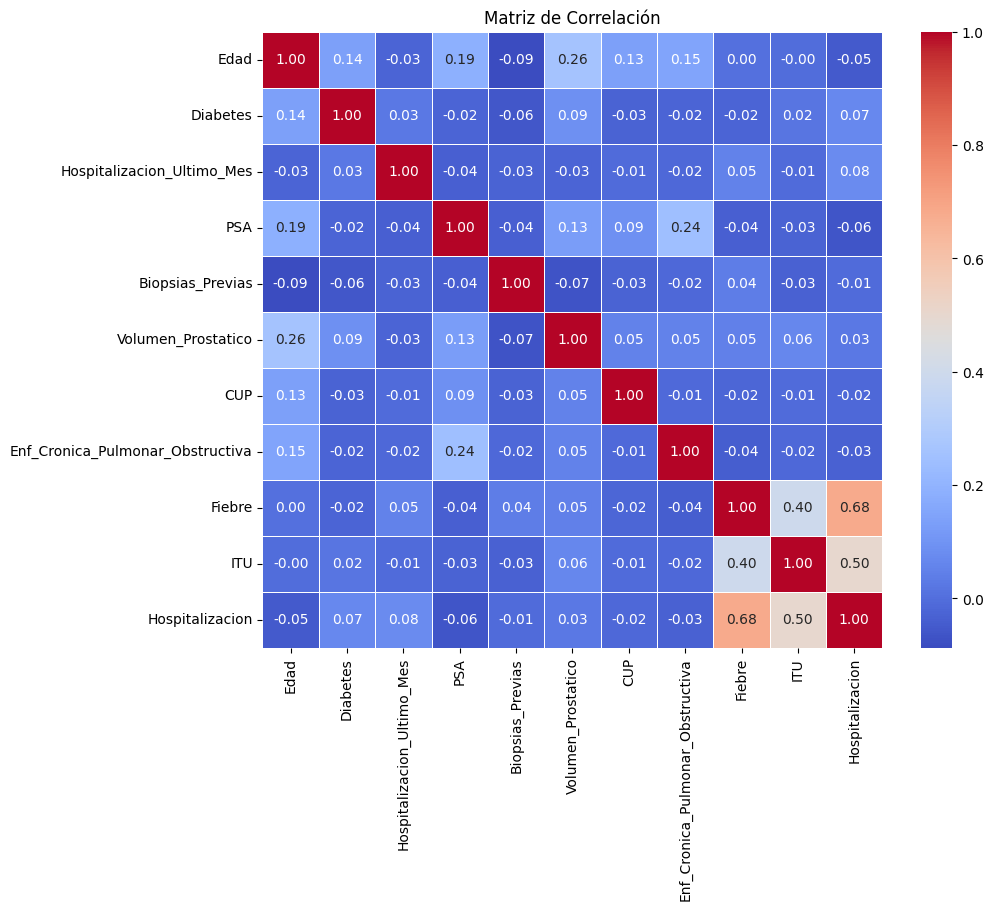

In [258]:
matriz_correlacion = df[['Edad', 'Diabetes', 'Hospitalizacion_Ultimo_Mes', 'PSA',
       'Biopsias_Previas', 'Volumen_Prostatico', 'CUP',
       'Enf_Cronica_Pulmonar_Obstructiva', 
       'Fiebre', 'ITU', 'Hospitalizacion']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [259]:
df.to_csv('Hospitales_limpio')